In [120]:
#Load the library with iris dataset
from sklearn.datasets import load_iris
#Load random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Import pandas as pd and numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
#Set random seed
np.random.seed(0)

In [17]:
#Read data
data_iris = load_iris()
#print(data_iris)
#Create a dataframe with the features
df = pd.DataFrame(data_iris.data, columns = data_iris.feature_names)
#View the top 5 rows
df.head()
#print(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
#Print target and the name of classes 0 - setosa, 1- versicolor, 2-virginica
print(data_iris.target)
print(data_iris.target_names)
#Add a new column
df["species"] = pd.Categorical.from_codes(data_iris.target,data_iris.target_names)
df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
#Create the train and test dataset - we set train = 80% and the rest of 20% will be for test
df["for_train"] = np.random.uniform(0,1,len(df)) <= 0.8
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,for_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


In [36]:
#Sort train and test
train, test = df[df["for_train"]==True], df[df["for_train"]==False]
print("Number of data in the training set: ",len(train))
print("Number of data in the testing set: ",len(test))

Number of data in the training set:  116
Number of data in the testing set:  34


In [42]:
#Create a feature list
feat = df.columns[:4]
print(feat)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [48]:
#Y generation for training set - each species converted to digits
Y = pd.factorize(train["species"])[0]
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


In [132]:
#Add the classifier
classifier = RandomForestClassifier(n_jobs=3,random_state = 0)
#Train the clssifier
classifier.fit(train[feat], Y)
#Predict test data based on training classifier
classifier.predict(test[feat])
#print(test[feat])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [67]:
#View the probability
classifier.predict_proba(test[feat])[0:5]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ]])

In [70]:
#Map the labels
prediction=data_iris.target_names[classifier.predict(test[feat])]
print(prediction)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica']


<AxesSubplot:xlabel='Predicted species', ylabel='Actual species'>

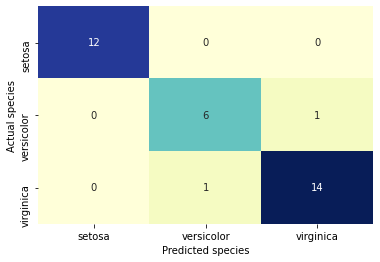

In [124]:
#Plot Confusion matrix
sns.heatmap(pd.crosstab(test["species"],prediction,rownames=["Actual species"],colnames = ["Predicted species"]),cmap="YlGnBu", annot=True, cbar=False)

In [166]:
#Calculation of the accuracy per species (TP+TN)/(TP+TN+FN+FP)
#Define confusion matrix (cm) for extracting the TP,TN,FP,FN
cm=pd.crosstab(test["species"],prediction,rownames=["Actual species"],colnames = ["Predicted species"])
#Setosa
TP_0, FN_0, FP_0, TN_0 = cm.iloc[0,0], np.sum(cm.iloc[0,1],cm.iloc[0,2]), np.sum(cm.iloc[1,0],cm.iloc[2,0]), (cm.iloc[1,1]+cm.iloc[1,2]+cm.iloc[2,1]+cm.iloc[2,2])
#Versicolor
TP_1, FN_1, FP_1, TN_1 = cm.iloc[1,1],(cm.iloc[1,0]+cm.iloc[1,2]),(cm.iloc[0,1]+cm.iloc[2,1]),(cm.iloc[0,0]+cm.iloc[0,2]+cm.iloc[2,0]+cm.iloc[2,2])
#Virginica
TP_2, FN_2, FP_2, TN_2 = cm.iloc[2,2],(cm.iloc[2,0]+cm.iloc[2,1]),(cm.iloc[0,2]+cm.iloc[1,2]),(cm.iloc[0,0]+cm.iloc[0,1]+cm.iloc[1,0]+cm.iloc[1,1])

Acc_setosa = (TP_0+TN_0) / (TP_0+TN_0+FN_0+FP_0)
Acc_versicolor = (TP_1+TN_1) / (TP_1+TN_1+FN_1+FP_1)
Acc_virginica = (TP_2+TN_2) / (TP_2+TN_2+FN_2+FP_2)
print("Accuracy for setosa: ", Acc_setosa)
print("Accuracy for versicolor: ", Acc_versicolor)
print("Accuracy for virginica: ", Acc_virginica)


Accuracy for setosa:  1.0
Accuracy for versicolor:  0.9411764705882353
Accuracy for virginica:  0.9411764705882353
